In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/development.csv').set_index('Id')


In [11]:
# df['age_quantiles'] = pd.qcut(df['age'], 20, labels=False, duplicates='drop')
# df['age_quantiles'] = pd.cut(df['age'], bins=[0,20,30,40,50,60,100], labels=False, right=False)
df['age_quantiles'] = pd.cut(df['age'], bins=range(0,105,5), labels=False, right=False)
print(df[['age', 'age_quantiles']])

       age  age_quantiles
Id                       
0     24.0              4
1     22.5              4
2     22.0              4
3     22.0              4
4     22.0              4
...    ...            ...
2928  24.0              4
2929  15.0              3
2930  17.0              3
2931  18.0              3
2932  18.0              3

[2933 rows x 2 columns]


In [12]:
quantile_min_max = df.groupby('age_quantiles')['age'].agg(['min', 'max', 'count', 'median'])
print(quantile_min_max)

                min   max  count  median
age_quantiles                           
1               6.0   7.0      2     6.5
3              15.0  19.0    832    18.0
4              20.0  24.0    858    22.0
5              25.0  29.0    393    26.0
6              30.0  34.0    211    31.0
7              35.0  39.0    165    37.0
8              40.0  44.0    112    42.0
9              45.0  49.0     92    47.0
10             50.0  54.0    100    52.0
11             55.0  59.0     57    57.0
12             60.0  64.0     41    62.0
13             65.0  69.0     25    67.0
14             70.0  74.0     15    72.0
15             75.0  79.0     12    77.0
16             80.0  84.0     12    82.0
17             85.0  88.0      4    86.0
18             90.0  90.0      1    90.0
19             97.0  97.0      1    97.0


In [13]:
quantile_min_max['count'] < 0.01 * len(df), 0.01 * len(df)

age_quantiles
1      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: count, dtype: bool

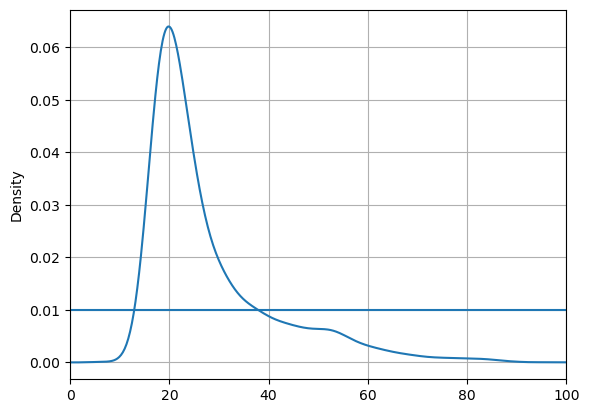

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df.age.plot(kind='kde',xlim=(0,100), ax=ax)
ax.axhline(0.01)
ax.grid(True)

In [33]:
y_age = df['age']
y = df['age_quantiles']

df.drop(['sampling_rate', 'path', 'num_characters'], axis=1, inplace=True)
df['tempo'] = df['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
df.drop('ethnicity', axis=1, inplace=True)
gender =  {'male': 1, 'female': 0, "famale": 0}
df['gender'] = df['gender'].map(gender)

X = df.drop(['age_quantiles', 'age'], axis=1)    

<class 'pandas.core.series.Series'>
Index: 2933 entries, 0 to 2932
Series name: age_quantiles
Non-Null Count  Dtype  
--------------  -----  
2863 non-null   float64
dtypes: float64(1)
memory usage: 45.8 KB


In [51]:
X

,gender,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_pauses,silence_duration
Id,,,,,,,,,,,,,,
0,0,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,151.999081,-123.999726,69,39,23.846893
1,0,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,129.199219,-86.928478,69,21,19.388662
2,0,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,117.453835,-98.450670,69,1,21.640998
3,0,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,117.453835,-56.459762,69,9,19.644127
4,1,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,112.347147,-80.349204,69,11,18.041905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,1,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,184.570312,-100.921055,69,11,17.461406
2929,0,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,83.354335,6.757283,0,1,1.509206
2930,0,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,89.102909,-53.913449,1,1,1.645034


[8.38769579e-01 8.16335392e-02 2.80022606e-02 1.31366095e-02
 1.14500376e-02 8.07738326e-03 5.40084011e-03 4.63808743e-03
 3.59964118e-03 2.33201045e-03 1.67166309e-03 1.02119684e-03
 2.60124648e-04 7.02666429e-06]


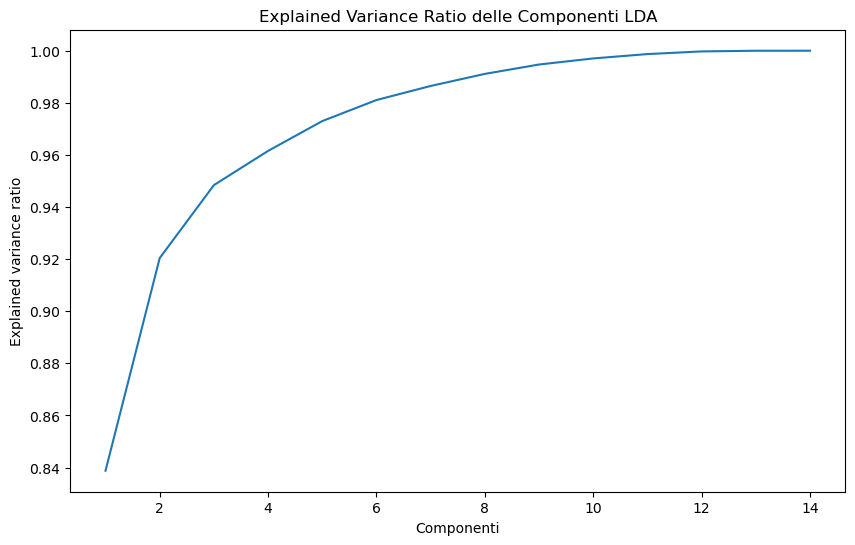

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Creare un'istanza di LDA
lda = LDA()
scaler = StandardScaler()

# Adattare e trasformare i dati
X_lda = lda.fit_transform(scaler.fit_transform(X), y)

import matplotlib.pyplot as plt

# Visualizza l'explained variance
explained_variance = lda.explained_variance_ratio_
print(explained_variance)

# Grafico dell'explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance))
plt.ylabel('Explained variance ratio')
plt.xlabel('Componenti')
plt.title('Explained Variance Ratio delle Componenti LDA')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, root_mean_squared_error

# Suddividi i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

for model in [LogisticRegression(max_iter=1000), RandomForestClassifier(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), MLPClassifier()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    print(f'{model.__class__.__name__} ACC: {acc} RMSE: {rmse}')


LogisticRegression ACC: 0.4071550255536627 RMSE: 2.6373674345202267
RandomForestClassifier ACC: 0.393526405451448 RMSE: 2.437987272747412
SVC ACC: 0.41737649063032367 RMSE: 2.6681923517419763
DecisionTreeClassifier ACC: 0.2981260647359455 RMSE: 2.938900813191649
KNeighborsClassifier ACC: 0.3594548551959114 RMSE: 2.5910999552030973
MLPClassifier ACC: 0.3747870528109029 RMSE: 2.440431720960003


c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
from sklearn.metrics import classification_report

# Predici i valori di test
y_pred_mlp = model.predict(X_test)

# Stampa il classification report
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.58      0.63      0.60       183
           4       0.36      0.44      0.39       175
           5       0.17      0.17      0.17        80
           6       0.00      0.00      0.00        35
           7       0.35      0.23      0.27        31
           8       0.06      0.07      0.06        15
           9       0.09      0.07      0.08        15
          10       0.15      0.14      0.14        22
          11       0.20      0.11      0.14         9
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         5
          15       0.50      0.33      0.40         3
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.37       587
   macro avg       0.15   

c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Definisci il pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LDA()),
    ('knn', KNeighborsRegressor())
])

# Definisci i parametri per la grid search
param_grid = {
    'lda__n_components': [1,2,3,4,5,6,7,8,9,None],
    'knn__n_neighbors': [39]
}

# Esegui la grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

# Stampa i migliori parametri e il miglior score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE: {-grid_search.best_score_}")



Best parameters: {'knn__n_neighbors': 39, 'lda__n_components': 8}
Best RMSE: 3.963210499282854


In [90]:
lda = LDA(n_components=8)
model = KNeighborsRegressor(n_neighbors=39)
scaler = StandardScaler()

X_lda = lda.fit_transform(scaler.fit_transform(X), y)
model.fit(X_lda, y)

KNeighborsRegressor(n_neighbors=39)

In [91]:
ef = pd.read_csv('data/evaluation.csv').set_index('Id') 
ef.drop(['sampling_rate', 'path', 'num_characters', 'ethnicity'], axis=1, inplace=True)
ef['tempo'] = ef['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype(float)
ef['gender'] = ef['gender'].map(gender)

X_test = lda.transform(scaler.transform(ef))
y_pred = model.predict(X_test)

pd.DataFrame({'Id': ef.index, 'Predicted': y_pred}).to_csv('out/evaluation_submission.csv', index=False)
